# LabEnhancement for Logistic Regression

# Data Processing

The lab Enhancements Done  :

1. Made the class distribution for the pima-indians-diabetes.csv balanced
2. Showing different solvers of Logistic Regression to accomodate small datasets

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# This is needed if you need to read data from your Google Drive
import os

try:
    from google.colab import drive
    drive.mount('/content/drive')

    notebook_path = r"/content/drive/Shareddrives/Machine Learning/Submission/Lab enchancement/Dataset"
    os.chdir(notebook_path)
    !pwd
except ImportError:
    pass # do nothing

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
df_pp = pd.read_csv("pima-indians-diabetes.csv", header = 0, names = col_names)
df_pp.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Split the dataset to train and test (0.3)

In [6]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df_pp.loc[:, df_pp.columns != 'label']
y = df_pp.loc[:, df_pp.columns == 'label']

# use stratification to ensure each class is sampled in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)


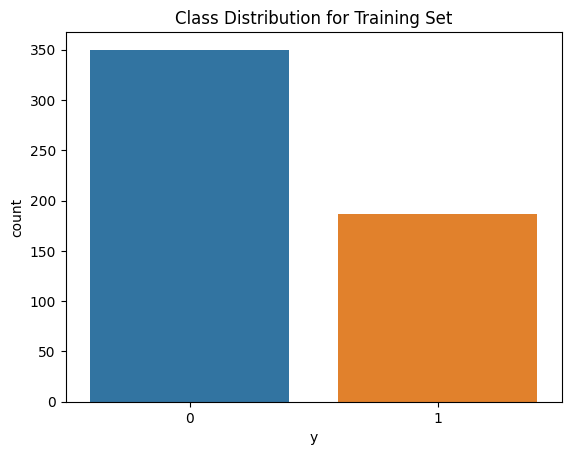

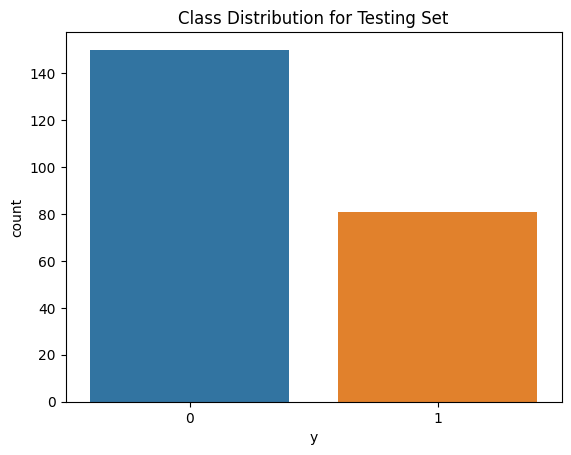

In [7]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

In [8]:
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [9]:
#check values of each categorical attribute
print(df_pp.dtypes)

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object


Normalising numerical data

In [10]:
#normalize numerical attributes
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_preprocess = X_train.copy()
num_attributes = X_train.select_dtypes(['int64','float64']).columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])

X_test_preprocess = X_test.copy()
X_test_preprocess[num_attributes] = min_max_scaler.transform(X_test_preprocess[num_attributes])
display(X_test_preprocess)

# X_train_preprocess = pd.DataFrame(X_train_preprocess, columns = num_attributes)
display(X_train_preprocess)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
608,0.000000,0.763819,0.672131,0.393939,0.321513,0.618480,0.081981,0.100000
626,0.000000,0.628141,0.557377,0.000000,0.000000,0.368107,0.054654,0.000000
678,0.176471,0.608040,0.426230,0.000000,0.000000,0.536513,0.020922,0.066667
186,0.470588,0.909548,0.557377,0.363636,0.585106,0.448584,0.229291,0.650000
520,0.117647,0.341709,0.573770,0.323232,0.078014,0.372578,0.046541,0.066667
...,...,...,...,...,...,...,...,...
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333
529,0.000000,0.557789,0.532787,0.000000,0.000000,0.366617,0.248506,0.166667
273,0.058824,0.356784,0.639344,0.505051,0.053191,0.494784,0.146883,0.000000
11,0.588235,0.844221,0.606557,0.000000,0.000000,0.566319,0.195986,0.216667


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
34,0.588235,0.613065,0.639344,0.313131,0.000000,0.411326,0.185312,0.400000
221,0.117647,0.793970,0.737705,0.000000,0.000000,0.470939,0.310418,0.750000
531,0.000000,0.537688,0.622951,0.000000,0.000000,0.675112,0.259607,0.050000
518,0.764706,0.381910,0.491803,0.000000,0.000000,0.488823,0.043553,0.333333
650,0.058824,0.457286,0.442623,0.252525,0.118203,0.375559,0.066610,0.033333
...,...,...,...,...,...,...,...,...
628,0.294118,0.643216,0.655738,0.000000,0.000000,0.515648,0.028181,0.400000
456,0.058824,0.678392,0.442623,0.000000,0.000000,0.397914,0.260034,0.683333
398,0.176471,0.412060,0.573770,0.000000,0.000000,0.314456,0.132792,0.066667
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333


Using SMOTE to sample data

In [11]:
from imblearn.over_sampling import SMOTE


ovr_samp = SMOTE(random_state=0)
X_ovr_samp, y_ovr_samp = ovr_samp.fit_resample(X_train_preprocess, y_train)
X_ovr_samp = pd.DataFrame(data=X_ovr_samp, columns=X_train_preprocess.columns)

X_test_oversampled, y_test_oversampled = ovr_samp.fit_resample(X_test_preprocess, y_test)
X_test_oversampled = pd.DataFrame(data=X_test_oversampled, columns=X_test_preprocess.columns)


display(X_ovr_samp)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,0.588235,0.613065,0.639344,0.313131,0.000000,0.411326,0.185312,0.400000
1,0.117647,0.793970,0.737705,0.000000,0.000000,0.470939,0.310418,0.750000
2,0.000000,0.537688,0.622951,0.000000,0.000000,0.675112,0.259607,0.050000
3,0.764706,0.381910,0.491803,0.000000,0.000000,0.488823,0.043553,0.333333
4,0.058824,0.457286,0.442623,0.252525,0.118203,0.375559,0.066610,0.033333
...,...,...,...,...,...,...,...,...
695,0.176471,0.862726,0.489657,0.233927,0.252257,0.495926,0.204497,0.247586
696,0.440474,0.551563,0.000000,0.000000,0.000000,0.447094,0.110630,0.232139
697,0.138565,0.784255,0.478697,0.283503,0.549185,0.559792,0.084963,0.125935
698,0.055320,0.611868,0.534355,0.332258,0.189608,0.532599,0.258583,0.150993


In [12]:
print (X_ovr_samp.shape)
print (X_test_oversampled.shape)
print (y_ovr_samp.shape)
print (y_test_oversampled.shape)

(700, 8)
(300, 8)
(700,)
(300,)


Below shows the balanced class distribution for the training set

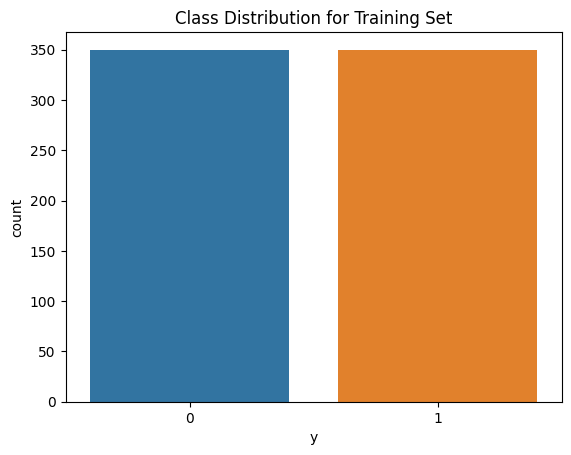

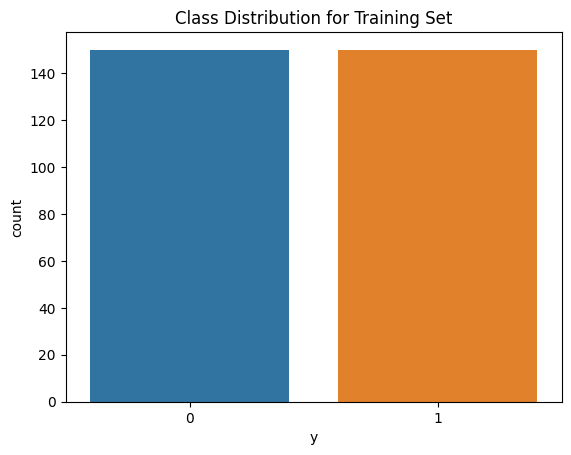

In [13]:
plt.figure()
sns.countplot(x='y', data = pd.DataFrame(data=y_ovr_samp,columns=['y']))
plt.title('Class Distribution for Training Set')
plt.show()

plt.figure()
sns.countplot(x='y', data = pd.DataFrame(data=y_test_oversampled,columns=['y']))
plt.title('Class Distribution for Training Set')
plt.show()

## Logistic Regression Time

In [14]:
X_train_rows = len(X_ovr_samp) #save the number of rows of training data
X_train_test = pd.concat(objs=[X_ovr_samp, X_test_oversampled], axis=0) #concatenate the training and testing attributes

#split the training and testing attributes back into individual variables
X_train_onehot = X_train_test[:X_train_rows]
X_test_onehot = X_train_test[X_train_rows:]

print (y_test_oversampled.shape)


display(X_train_onehot)

(300,)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,0.588235,0.613065,0.639344,0.313131,0.000000,0.411326,0.185312,0.400000
1,0.117647,0.793970,0.737705,0.000000,0.000000,0.470939,0.310418,0.750000
2,0.000000,0.537688,0.622951,0.000000,0.000000,0.675112,0.259607,0.050000
3,0.764706,0.381910,0.491803,0.000000,0.000000,0.488823,0.043553,0.333333
4,0.058824,0.457286,0.442623,0.252525,0.118203,0.375559,0.066610,0.033333
...,...,...,...,...,...,...,...,...
695,0.176471,0.862726,0.489657,0.233927,0.252257,0.495926,0.204497,0.247586
696,0.440474,0.551563,0.000000,0.000000,0.000000,0.447094,0.110630,0.232139
697,0.138565,0.784255,0.478697,0.283503,0.549185,0.559792,0.084963,0.125935
698,0.055320,0.611868,0.534355,0.332258,0.189608,0.532599,0.258583,0.150993


In [15]:
print (X_ovr_samp.shape)
print (X_test_oversampled.shape)
print (y_ovr_samp.shape)
print (y_test_oversampled.shape)

print (X_train_onehot.shape)
print (X_test_onehot.shape)

(700, 8)
(300, 8)
(700,)
(300,)
(700, 8)
(300, 8)


Test is showing a training accuracy of 0.73, and testing accuracy of 0.773. This shows a better fitting of data than what Sir Wong Ya Ping did for the training model. ( Testing accuracy and Training accuracy of the Lab from ya ping is shown below)

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
logreg.fit(X_train_onehot, y_ovr_samp) #Train model

print (y_test_oversampled.shape)
#check performance on training set
print('Training accuracy: ', logreg.score(X_train_onehot,y_ovr_samp))

(300,)
Training accuracy:  0.7357142857142858


In [17]:
print('Testing accuracy: ', logreg.score(X_test_onehot, y_test_oversampled) )

Testing accuracy:  0.77


Below shows the learning curve for the Model. A good training score should be a high value, and the cross-validation score should be a high value, but lower than training score

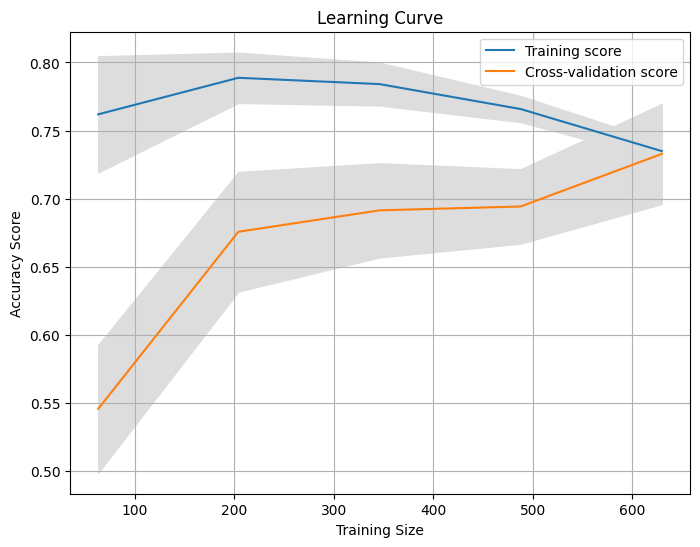

In [18]:

from sklearn.model_selection import learning_curve

# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train_onehot, y_ovr_samp, cv=10)

# Calculate the mean and standard deviation for the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

Another Model is trained to see if Another logisticRegression solver can increase Training Accuraccy, Liblinear is used with a coefficient of 1.0 to accomodate for small datasets

In [19]:

logreglib = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
logreglib.fit(X_train_onehot, y_ovr_samp)

print('Training accuracy: ', logreglib.score(X_train_onehot,y_ovr_samp))
print('Testing accuracy: ', logreglib.score(X_test_onehot, y_test_oversampled) )

Training accuracy:  0.7442857142857143
Testing accuracy:  0.78


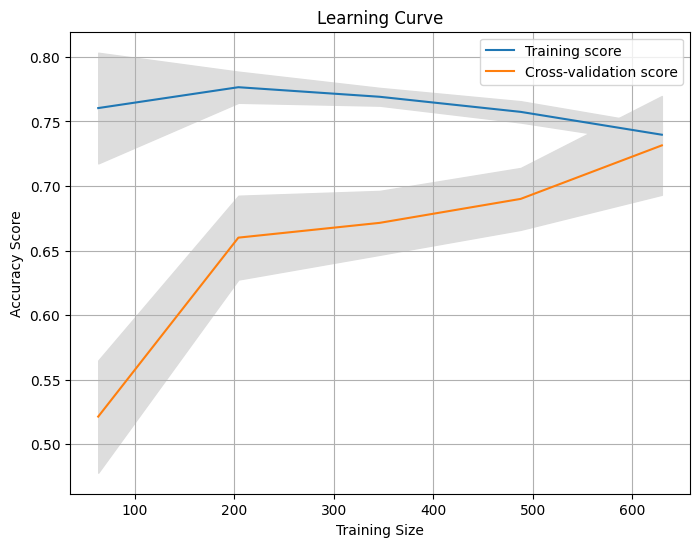

In [20]:

from sklearn.model_selection import learning_curve

# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(logreglib, X_train_onehot, y_ovr_samp, cv=10)

# Calculate the mean and standard deviation for the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

The Lab_6 from Wong Ya Ping states a Training accuracy of 0.77 and a Testing accuracy of 0.81 as shown below. Having a testing accuracy that is higher than Training accuracy can mean an overfitting of data

![image.png](attachment:image.png)

Showing classification report of the lbsg solver

In [21]:


y_pred = logreg.predict(X_test_preprocess)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       150
           1       0.67      0.72      0.69        81

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.76       231
weighted avg       0.78      0.77      0.78       231



In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
print('True positive: ',tp)
print('True negatives: ',tn)
print('False positive: ',fp)
print('False negatives: ',fn)

[[121  29]
 [ 23  58]]
True positive:  58
True negatives:  121
False positive:  29
False negatives:  23


Showing confusion matrix

<Axes: >

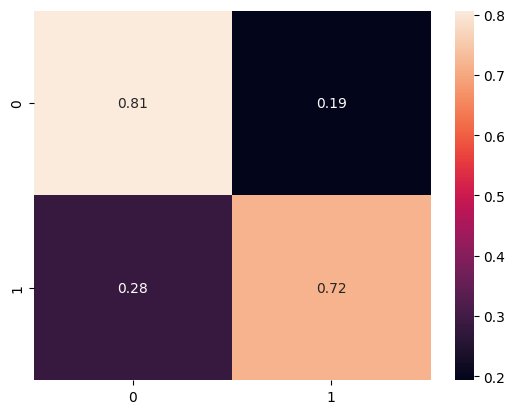

In [23]:
conf_mat = confusion_matrix(y_test, y_pred,normalize='true')
sns.heatmap(conf_mat, annot=True)